# Hiring Process Analytics

1. Impoting all the libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2. Loading the CSV file

In [8]:
df= pd.read_csv("Statistics - Sheet1.csv")
df

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,5/1/14 11:40,Hired,Male,Service Department,c8,56553.0
1,907518,5/6/14 8:08,Hired,Female,Service Department,c5,22075.0
2,176719,5/6/14 8:08,Rejected,Male,Service Department,c5,70069.0
3,429799,5/2/14 16:28,Rejected,Female,Operations Department,i4,3207.0
4,253651,5/2/14 16:32,Hired,Male,Operations Department,i4,29668.0
...,...,...,...,...,...,...,...
7163,493131,8/28/14 17:32,Hired,Male,Service Department,c9,49282.0
7164,214261,8/31/14 1:36,Hired,Female,Service Department,c5,57742.0
7165,932441,8/31/14 1:37,Hired,Male,Service Department,c5,69932.0
7166,39010,8/31/14 1:38,Rejected,Male,Service Department,c5,14489.0


# Preprocessing
1. Cleaning the data
    * Checking for duplicate values
    * Finding irrelevant columns
    * Finding/ determining null values

* Checking for duplicate values

In [9]:
df.duplicated().sum()

0

>> There are no duplicate values

* Finding irrelevant columns

In [10]:
df.keys()

Index(['application_id', 'Interview Taken on', 'Status', 'event_name',
       'Department', 'Post Name', 'Offered Salary'],
      dtype='object')

>> There are no irrelevant columns

* Checking for NULL values

In [11]:
df.isnull().sum()

application_id        0
Interview Taken on    0
Status                0
event_name            0
Department            0
Post Name             0
Offered Salary        1
dtype: int64

> Only one null cell found
>> filling the cell with the mean

In [13]:
df['Offered Salary'].describe()

count      7167.000000
mean      49983.029022
std       28854.176890
min         100.000000
25%       25460.500000
50%       49625.000000
75%       74438.000000
max      400000.000000
Name: Offered Salary, dtype: float64

In [14]:
df['Offered Salary'].fillna(49983, inplace=True)

# Analysis

1. Hiring
2. Average Salary
3. Class Interval
4. Charts and Plots
5. Charts

1. Hiring:
    * Process of intaking of people into an organization for different kinds of positions
    * task: How many males and females are Hired ? 

In [17]:
Gender_info=df['event_name'].value_counts()
print(Gender_info)

event_name
Male                 4085
Female               2675
Don’t want to say     393
-                      15
Name: count, dtype: int64


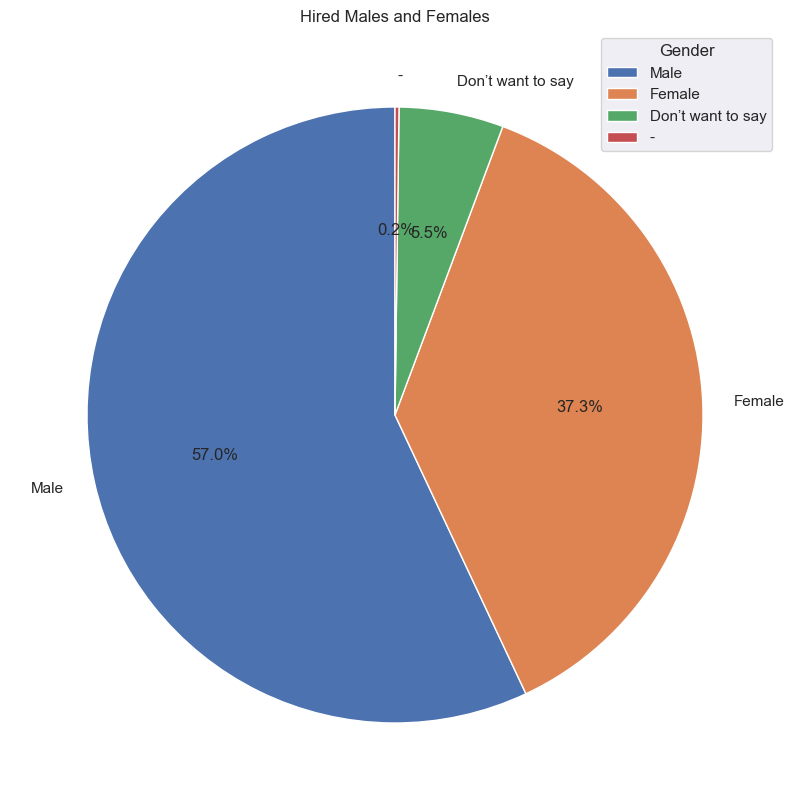

In [26]:
# Create a pie chart using seaborn
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.color_palette("pastel")
plt.title("Hired Males and Females")

# Plot the pie chart
plt.pie(Gender_info, labels=Gender_info.index, autopct='%1.1f%%', startangle=90)

# Add a legend
plt.legend(title='Gender', loc='upper right')

# Show the chart
plt.show()

2. Average Salary
    * Adding all the salaries for a select group of employees and then dividing the sum by the number of employees in the group. 

In [28]:
average_salary = df['Offered Salary'].mean()

# Print the average salary
print("Average Salary:", average_salary)

Average Salary: 49983.029017857145


3. Class Intervals
    * The class interval is the difference between the upper class limit and the lower class limit. 

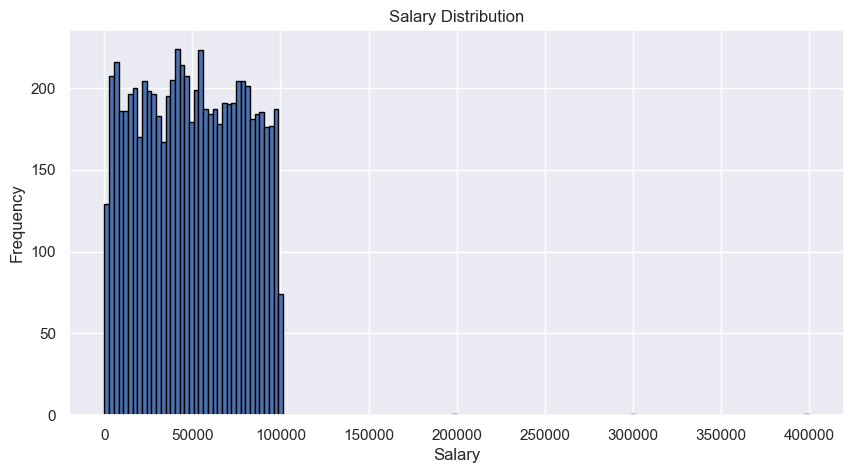

In [48]:
# Create a histogram with class intervals for salary
plt.figure(figsize=(10,5))
plt.hist(df['Offered Salary'], bins=150, edgecolor='black')

# Set the x-axis label and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')

# Show the plot
plt.show()

* Class Interval based on Gender using pivot table

In [57]:
bin_edges = [0, 20000, 40000, 60000, 80000, 100000, 200000, 400000]

# Create a new column with the salary range for each individual
df['Range_Salary'] = pd.cut(df['Offered Salary'], bins=bin_edges)

# Create a pivot table to calculate the count of individuals by salary range and gender
pivot_table = pd.pivot_table(df, values='application_id', index='Range_Salary', columns='event_name', aggfunc='count')

# Display the pivot table
print(pivot_table)

event_name        -  Don’t want to say  Female  Male
Range_Salary                                        
(0, 20000]        5                 76     522   807
(20000, 40000]    3                 88     515   815
(40000, 60000]    0                 73     587   872
(60000, 80000]    2                 74     549   807
(80000, 100000]   5                 82     500   783
(100000, 200000]  0                  0       1     0
(200000, 400000]  0                  0       1     1


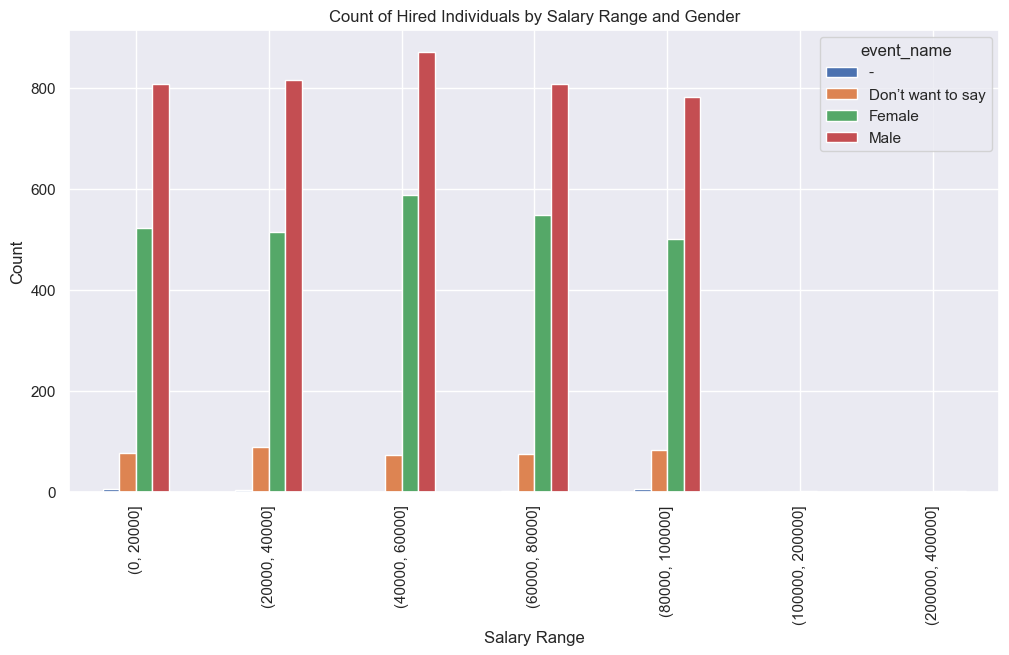

In [62]:
# Plot the pivot table as a stacked bar chart
pivot_table.plot(kind='bar', stacked= False, figsize=(12,6))

# Set the x-axis label, y-axis label, and title
plt.xlabel('Salary Range')
plt.ylabel('Count')
plt.title('Count of Hired Individuals by Salary Range and Gender')

# Show the plot
plt.show()

4.  Charts and Plots

* Proportion of people working on different department

In [63]:
df.keys()

Index(['application_id', 'Interview Taken on', 'Status', 'event_name',
       'Department', 'Post Name', 'Offered Salary', 'Range_Salary'],
      dtype='object')

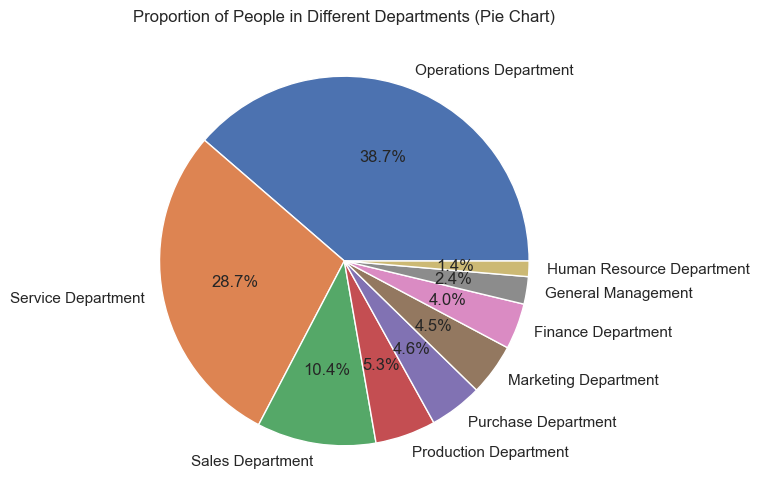

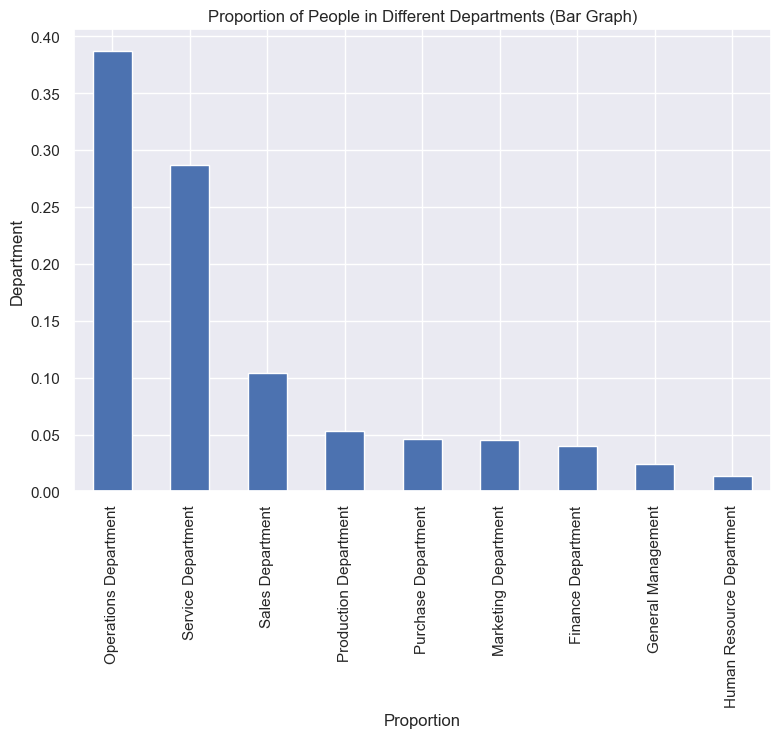

In [71]:
# Calculate the proportion of people in each department
department_counts = df['Department'].value_counts()
department_proportions = department_counts / department_counts.sum()

# Create a pie chart
plt.figure(figsize=(9, 6))
plt.pie(department_proportions, labels=department_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of People in Different Departments (Pie Chart)')

# Create a horizontal bar graph
plt.figure(figsize=(9, 6))
department_proportions.plot(kind='bar')
plt.xlabel('Proportion')
plt.ylabel('Department')
plt.title('Proportion of People in Different Departments (Bar Graph)')

# Show the plots
plt.show()


* Grouped Bar Chart - Department Distribution by Gender

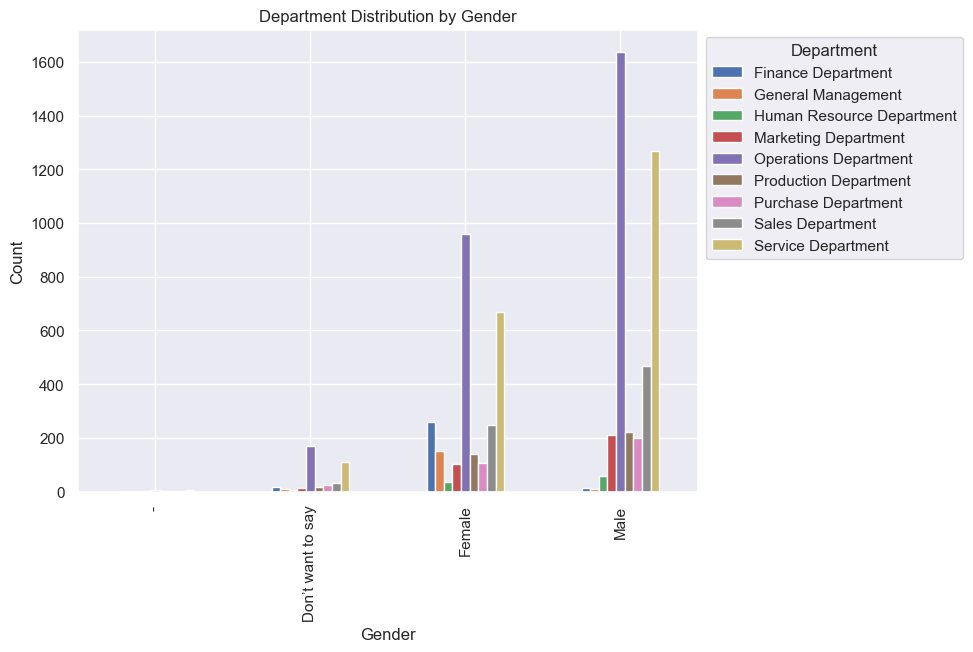

In [87]:
gender_department_counts = df.groupby(['event_name', 'Department']).size().unstack()
gender_department_counts.plot(kind='bar', stacked=False, figsize=(8,6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Department Distribution by Gender')
plt.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

5. Charts
    * Useing different charts and graphs to perform the task representing the data.
    * task: Represent different post tiers using chart/graph

* Bar Chat for Hired Post Tiers

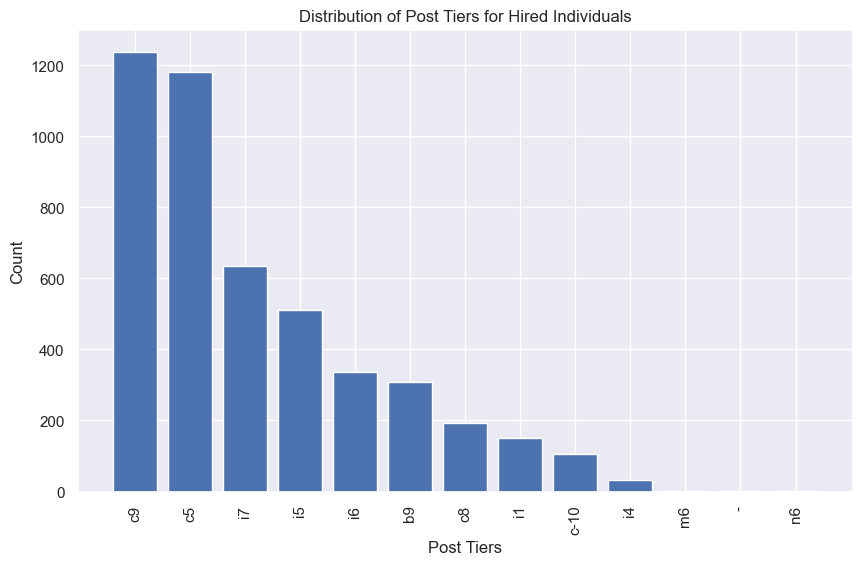

In [90]:
# Filter the DataFrame to include only the hired individuals
df_hired = df[df['Status'] == 'Hired']

# Group the hired individuals by 'Post Name' and calculate the count of each post tier
post_tier_counts = df_hired.groupby('Post Name').size()

# Sort the post tiers in descending order based on their counts
post_tier_counts = post_tier_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(post_tier_counts.index, post_tier_counts)
plt.xlabel('Post Tiers')
plt.ylabel('Count')
plt.title('Distribution of Post Tiers for Hired Individuals')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


* Pie Chart for Hired post tiers

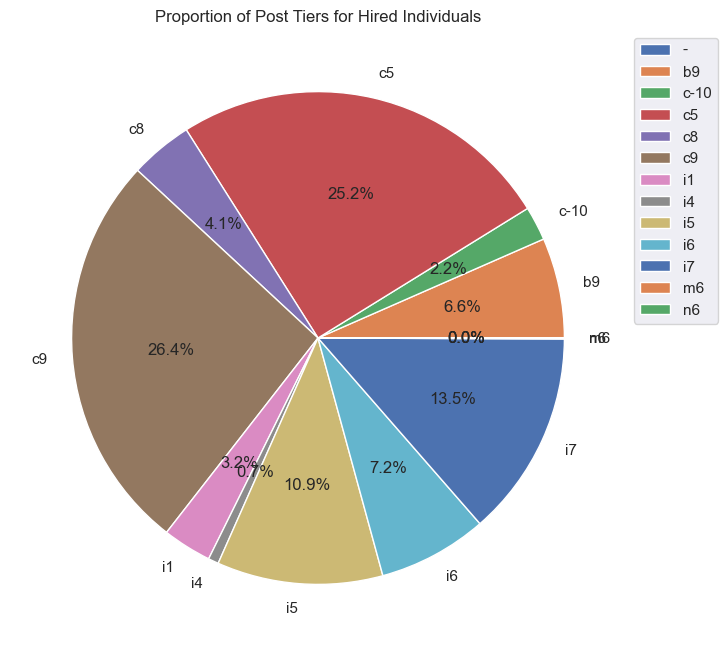

In [93]:
# Filter the DataFrame to include only the hired
df_hired = df[df['Status'] == 'Hired']

# Group the hired individuals by 'Post Name' and calculate the count of each post tier
post_tier_counts = df_hired.groupby('Post Name').size()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(post_tier_counts, labels=post_tier_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Post Tiers for Hired Individuals')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# Display the plot
plt.show()

# Thank You